# New features in version 0.4.0

Released in May, 2020

---

In [1]:
import veroviz as vrv
vrv.checkVersion()

'Your current installed version of veroviz is 0.4.0, the latest version available is 0.3.1. To update to the latest version, type `pip install --upgrade veroviz` at a command-line prompt.'

#### Many of the examples below require the use of API keys for certain data providers.  

If you have saved your API keys as environment variables, you may use `os.environ` to access them:

In [30]:
import os

ORS_API_KEY     = os.environ['ORSKEY']
OPENWEATHER_KEY = os.environ['OPENWEATHERKEY']
ELEV_API_KEY    = os.environ['ELEVAPIKEY']

Otherwise, you may specify your keys here:

In [31]:
# ORS_API_KEY     = 'YOUR_ORS_KEY_GOES_HERE'
# OPENWEATHER_KEY = 'YOUR_OPENWEATHERMAP_KEY_GOES_HERE'
# ELEV_API_KEY    = 'YOUR_ELEVATION-API_KEY_GOES_HERE'

--- 

## New Utility Functions
Version 0.4.0 introduces 9 new "utility" functions:
1. `isochrones()`
1. `createGantt()`
1. `getElevationLocs()`
1. `getElevationDF()`
1. `closestPointLoc2Path()`
1. `closestNode2Loc()`
1. `lengthFromNodeSeq()`
1. `calcArea()`
1. `getWeather()`

### 1. `isochrones()`
- Finds isochrones (lines corresponding to points of equal distance or time from a given location) to or from a given location.  

In [3]:
# Get distance-based isochrones from a given location:
iso = vrv.isochrones(location         = [43.00154, -78.7871],
                     rangeType        = 'distance', 
                     rangeSize        = 4000, 
                     dataProvider     = 'ors-online', 
                     dataProviderArgs = {'APIkey': ORS_API_KEY})
iso

{'location': [43.00154, -78.7871],
 'boundingRegion': [[42.970807, -78.822747],
  [43.023956, -78.822747],
  [43.023956, -78.75045],
  [42.970807, -78.75045],
  [42.970807, -78.822747]],
 'isochrones': [{'value': 4000.0,
   'valueUnits': 'meters',
   'area': 22785156.63,
   'pop': 24714.0,
   'reachfactor': 0.4533,
   'poly': [[[42.990389, -78.822747],
     [42.985234, -78.820425],
     [42.982608, -78.817692],
     [42.980989, -78.815432],
     [42.979131, -78.81134],
     [42.978721, -78.810572],
     [42.971718, -78.805052],
     [42.970808, -78.799091],
     [42.970807, -78.798302],
     [42.972003, -78.796136],
     [42.973876, -78.792663],
     [42.973905, -78.783909],
     [42.973905, -78.783883],
     [42.973905, -78.783858],
     [42.973907, -78.783622],
     [42.974577, -78.782092],
     [42.975668, -78.77393],
     [42.975461, -78.771004],
     [42.976333, -78.769393],
     [42.979933, -78.769363],
     [42.984456, -78.763039],
     [42.984721, -78.760333],
     [42.986596, 

In [4]:
# Draw the result on a Leaflet map:
vrv.addLeafletIsochrones(iso=iso)

# Click on the shaded area of the map for additional info

In [5]:
# Example 2 - This example includes all function arguments:
iso2 = vrv.isochrones(location         = [43.00154, -78.7871], 
                      locationType     = 'start', 
                      travelMode       = 'driving-car', 
                      rangeType        = 'time', 
                      rangeSize        = vrv.convertTime(5, 'minutes', 'seconds'), 
                      interval         = vrv.convertTime(1, 'minutes', 'seconds'), 
                      smoothing        = 5, 
                      dataProvider     ='ors-online', 
                      dataProviderArgs = {'APIkey': ORS_API_KEY})

In [6]:
vrv.addLeafletIsochrones(iso=iso2)

In [7]:
# Customize the map by using the `addLeafletPolygon()` function:
myColors = ['red', 'blue', 'green']

myMap = vrv.addLeafletIcon(location=iso2['location'])

for i in range(len(iso2['isochrones'])-1, -1, -1):
    lineColor = myColors[i % len(myColors)]
    fillColor = lineColor
    for j in range(0, len(iso2['isochrones'][i]['poly'])):
        myMap = vrv.addLeafletPolygon(mapObject = myMap,
                                      points    = iso2['isochrones'][i]['poly'][j],
                                      lineColor = lineColor,
                                      fillColor = fillColor)

myMap   

### 2. `createGantt()`
- Draws a Gantt chart from an `Assignments` dataframe.  This has the appearance of a horizontal bar chart.  The x-axis indicates the elapsed time.  Each `objectID` forms a horizontal bar.

In [5]:
# Start by defining some locations for our vehicles to visit:
locs = [[42.8871085, -78.8731949],
        [42.8888311, -78.8649649],
        [42.8802158, -78.8660787],
        [42.8845705, -78.8762794],
        [42.8908031, -78.8770140]]

In [6]:
# Convert these locations into a `Nodes` dataframe:
myNodes = vrv.createNodesFromLocs(locs=locs)
myNodes

,id,lat,lon,altMeters,nodeName,nodeType,popupText,leafletIconPrefix,leafletIconType,leafletColor,leafletIconText,cesiumIconType,cesiumColor,cesiumIconText,elevMeters
0,1,42.887108,-78.873195,0,None,None,1,glyphicon,info-sign,blue,1,pin,blue,1,None
1,2,42.888831,-78.864965,0,None,None,2,glyphicon,info-sign,blue,2,pin,blue,2,None
2,3,42.880216,-78.866079,0,None,None,3,glyphicon,info-sign,blue,3,pin,blue,3,None
3,4,42.884571,-78.876279,0,None,None,4,glyphicon,info-sign,blue,4,pin,blue,4,None
4,5,42.890803,-78.877014,0,None,None,5,glyphicon,info-sign,blue,5,pin,blue,5,None


In [10]:
# A car will start at node 1, visit nodes 2 and 3, and then return to node 1.
# A truck will follow a route from 1->5->4->1.
mySolution = {
    'car': [[1,2], [2,3], [3,1]],
    'truck': [[1,5], [5,4], [4,1]]
}

In [9]:
# Define some properties to use when building the `Assignments` dataframe:
vehicleProperties = {
    'car':   {'model': 'veroviz/models/car_red.gltf',
              'color': 'red'},
    'truck': {'model': 'veroviz/models/ub_truck.gltf',
              'color': 'blue'}
}

In [11]:
# Build the assignments dataframe for the 2 vehicle routes.
# No service times, Euclidean travel:
myAssignments = vrv.initDataframe('assignments')
for v in mySolution:
    endTimeSec = 0.0
    for arc in mySolution[v]:
        [myAssignments, endTimeSec] = vrv.addAssignment2D(
            initAssignments = myAssignments,
            objectID        = v,
            modelFile       = vehicleProperties[v]['model'],
            startLoc        = list(myNodes[myNodes['id'] == arc[0]][['lat', 'lon']].values[0]),
            endLoc          = list(myNodes[myNodes['id'] == arc[1]][['lat', 'lon']].values[0]),
            startTimeSec    = endTimeSec,
            routeType       = 'euclidean2D',
            speedMPS        = vrv.convertSpeed(25, 'miles', 'hour', 'meters', 'second'),
            leafletColor    = vehicleProperties[v]['color'],
            cesiumColor     = vehicleProperties[v]['color'],
            ganttColor      = vehicleProperties[v]['color'])
myAssignments

FIXMELP -- Need to validate `leafletCurveType` and `leafletCurvature`.
FIXMELP -- Need to validate `leafletCurveType` and `leafletCurvature`.
FIXMELP -- Need to validate `leafletCurveType` and `leafletCurvature`.
FIXMELP -- Need to validate `leafletCurveType` and `leafletCurvature`.
FIXMELP -- Need to validate `leafletCurveType` and `leafletCurvature`.
FIXMELP -- Need to validate `leafletCurveType` and `leafletCurvature`.


,odID,objectID,modelFile,modelScale,modelMinPxSize,startTimeSec,startLat,startLon,startAltMeters,endTimeSec,...,ganttColor,popupText,startElevMeters,endElevMeters,wayname,waycategory,surface,waytype,steepness,tollway
0,1,car,/veroviz/models/car_red.gltf,100,75,0.000000,42.887108,-78.873195,0,62.545331,...,red,None,None,None,None,None,None,None,None,None
1,2,car,/veroviz/models/car_red.gltf,100,75,62.545331,42.888831,-78.864965,0,148.568576,...,red,None,None,None,None,None,None,None,None,None
2,3,car,/veroviz/models/car_red.gltf,100,75,148.568576,42.880216,-78.866079,0,234.592456,...,red,None,None,None,None,None,None,None,None,None
3,4,truck,/veroviz/models/ub_truck.gltf,100,75,0.000000,42.887108,-78.873195,0,46.129575,...,blue,None,None,None,None,None,None,None,None,None
4,5,truck,/veroviz/models/ub_truck.gltf,100,75,46.129575,42.890803,-78.877014,0,108.314642,...,blue,None,None,None,None,None,None,None,None,None
5,6,truck,/veroviz/models/ub_truck.gltf,100,75,108.314642,42.884571,-78.876279,0,142.149457,...,blue,None,None,None,None,None,None,None,None,None


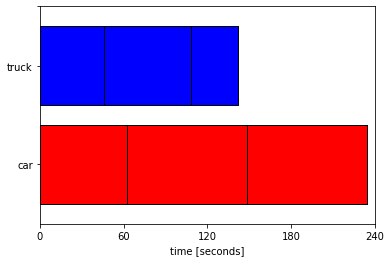

In [15]:
# Create a Gantt chart using the default settings:
vrv.createGantt(assignments = myAssignments, 
                xAxisLabel  = 'time [seconds]')

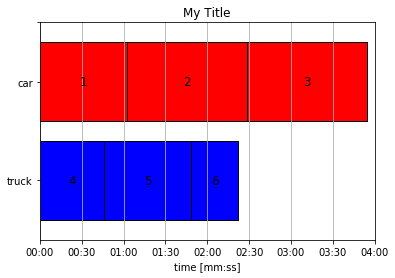

In [19]:
# Create (and save) a Gantt chart using all of the available settings:
vrv.createGantt(assignments         = myAssignments, 
                objectIDorder       = ['truck', 'car'], 
                separateByModelFile = False,
                mergeByodID         = True,
                splitOnColorChange  = True,
                title               = 'My Title',
                xAxisLabel          = 'time [mm:ss]',
                xGrid               = True,
                yGrid               = False,
                xMin                = 0,
                xMax                = None,
                xGridFreq           = 30,
                timeFormat          = 'MS',
                overlayColumn       = 'odID',
                missingColor        = 'lightgray',
                filename            = 'myGantt.png')

### 3. `getElevationLocs()`
- Finds the elevation, in units of meters above mean sea level (MSL), for a given location or list of locations. 

In [20]:
# Define a set of locations:
locs = [[42.8871085, -78.8731949],
        [42.8888311, -78.8649649],
        [42.8802158, -78.8660787],
        [42.8845705, -78.8762794],
        [42.8908031, -78.8770140]]

In [21]:
# Use ORS to find the elevations of all locations:
vrv.getElevationLocs(locs             = locs, 
                     dataProvider     = 'ors-online', 
                     dataProviderArgs = {'APIkey': ORS_API_KEY})

[[42.887108, -78.873195, 196.0],
 [42.888831, -78.864965, 185.0],
 [42.880216, -78.866079, 183.0],
 [42.884571, -78.876279, 200.0],
 [42.890803, -78.877014, 187.0]]

In [22]:
# Use ORS to find the elevation of a single location, with a starting elevation/altitude:
vrv.getElevationLocs(locs             = [[42.888, -78.864, 100]], 
                     dataProvider     = 'ors-online', 
                     dataProviderArgs = {'APIkey': ORS_API_KEY})

[[42.888, -78.864, 284.0]]

In [23]:
# Use the US Geological Survey data:
vrv.getElevationLocs(locs             = locs, 
                     dataProvider     = 'usgs')

[[42.8871085, -78.8731949, 187.66],
 [42.8888311, -78.8649649, 185.15],
 [42.8802158, -78.8660787, 181.1],
 [42.8845705, -78.8762794, 185.64],
 [42.8908031, -78.877014, 186.25]]

In [24]:
# Use Elevation-API:
vrv.getElevationLocs(locs             = [[42.888, -78.864, 100]], 
                     dataProvider     = 'elevapi',
                     dataProviderArgs = {'APIkey': ELEV_API_KEY})

[[42.888, -78.864, 292.0]]

### 4. `getElevationDF()`
- Replaces missing (`None`) values for elevation columns of the provided dataframe.  New values are in units of meters above mean sea level (MSL).

In [4]:
# Create a Nodes dataframe.  Note that, by default, there is no elevation data:
>>> myNodes = vrv.generateNodes(
...     numNodes        = 4,
...     nodeType        = 'depot', 
...     nodeDistrib     = 'normal', 
...     nodeDistribArgs = {
...         'center' : [42.30, -78.00], 
...         'stdDev' : 1000
...     })
>>> myNodes['elevMeters']

0    None
1    None
2    None
3    None
Name: elevMeters, dtype: object

In [5]:
# Find missing elevation data using ORS-online:
myNodesORS = vrv.getElevationDF(dataframe        = myNodes, 
                                dataProvider     = 'ors-online',
                                dataProviderArgs = {'APIkey': ORS_API_KEY})
myNodesORS['elevMeters']

0    460
1    448
2    461
3    446
Name: elevMeters, dtype: int64

In [6]:
# Find missing elevation data using USGS:
myNodesUSGS = vrv.getElevationDF(dataframe    = myNodes, 
                                 dataProvider = 'usgs')
myNodesUSGS['elevMeters']

0    442.58
1    447.53
2    455.06
3    444.21
Name: elevMeters, dtype: object

In [25]:
# Find missing elevation data using Elevation-API:
myNodesElevAPI = vrv.getElevationDF(dataframe        = myNodes, 
                                    dataProvider     = 'elevAPI',
                                    dataProviderArgs = {'APIkey': ELEV_API_KEY})
myNodesElevAPI['elevMeters']

0    192
1    192
2    192
3    178
4    178
Name: elevMeters, dtype: int64

In [6]:
vrv.createLeaflet(nodes=myNodes)

In [26]:
# Create an Arcs dataframe from a sequence of nodes:
myArcs = vrv.createArcsFromNodeSeq(
    nodeSeq = [1, 2, 3, 4],
    nodes   = myNodes)
myArcs

FIXMELP -- Need to validate `leafletCurveType` and `leafletCurvature`.


,odID,objectID,startLat,startLon,endLat,endLon,leafletColor,leafletWeight,leafletStyle,leafletOpacity,leafletCurveType,leafletCurvature,useArrows,cesiumColor,cesiumWeight,cesiumStyle,cesiumOpacity,popupText,startElevMeters,endElevMeters
0,1,None,42.887108,-78.873195,42.888831,-78.864965,orange,3,solid,0.8,straight,0,True,orange,3,solid,0.8,None,None,None
1,2,None,42.888831,-78.864965,42.880216,-78.866079,orange,3,solid,0.8,straight,0,True,orange,3,solid,0.8,None,None,None
2,3,None,42.880216,-78.866079,42.884571,-78.876279,orange,3,solid,0.8,straight,0,True,orange,3,solid,0.8,None,None,None


In [27]:
# Find missing start/end elevations in the arcs dataframe, using USGS data:
myArcsUSGS = vrv.getElevationDF(dataframe        = myArcs, 
                                dataProvider     = 'usgs')
myArcsUSGS[['startElevMeters', 'endElevMeters']]

,startElevMeters,endElevMeters
0,187.66,185.15
1,185.15,181.1
2,181.1,185.64


In [28]:
# Find missing start/end elevations in the arcs dataframe, using ORS-online:
myArcsORS = vrv.getElevationDF(dataframe        = myArcs, 
                               dataProvider     = 'ors-online',
                               dataProviderArgs = {'APIkey': ORS_API_KEY})
myArcsORS[['startElevMeters', 'endElevMeters']]

,startElevMeters,endElevMeters
0,196,185
1,185,183
2,183,200


In [29]:
# Find missing start/end elevations in the arcs dataframe, using Elevation-API:
myArcsElevAPI = vrv.getElevationDF(dataframe        = myArcs, 
                                   dataProvider     = 'elevAPI',
                                   dataProviderArgs = {'APIkey': ELEV_API_KEY})
myArcsElevAPI[['startElevMeters', 'endElevMeters']]

,startElevMeters,endElevMeters
0,192,192
1,192,192
2,192,178


### 5.  `closestPointLoc2Path()`
- Finds the point along a given line that is closest to a given location.  Returns the [lat, lon] coordinates of the point, and the corresponding distance (in [meters]) from that point to the line.

In [3]:
# Prepare some sample data
path = [[42.50, -78.65], [42.50, -78.40]]
loc1 = [42.50, -78.50]
loc2 = [42.51, -78.50]

In [4]:
# Draw the line and the 2 points on the map:
myMap = vrv.addLeafletPolyline(points = path)
myMap = vrv.addLeafletMarker(mapObject = myMap,
                             center = loc1, 
                             radius = 14,
                             text='1', fontColor='black')
myMap = vrv.addLeafletMarker(mapObject = myMap,
                             center = loc2, 
                             radius = 14,
                             text='2', fontColor='black')
myMap

FIXMELP -- Your branch has some code here, but it cannot be implemented because it is missing some variables.  Please fix this appropriately.


In [5]:
# Example 1 - The location is on the path:
vrv.closestPointLoc2Path(loc1, path)

([42.5, -78.5], 0.0)

In [6]:
# Example 2 - The minimum distance is between points on the path:
vrv.closestPointLoc2Path(loc2, path)

([42.5, -78.50000397522506], 1103.5612443321572)

In [7]:
# Example 3 - The location and path include altitudes (which are ignored):
path2 = [[42.50, -78.40, 100],
         [42.50, -78.60, 200],
         [42.40, -78.70, 100]]
loc3  = [42.51, -78.38, 300]
#loc3  = [42.50, -78.40, 100]

[nearestPt, distMeters] = vrv.closestPointLoc2Path(loc3, path2)
nearestPt, distMeters

([42.5, -78.4, 0], 1983.9823096544242)

In [8]:
# Draw the line, the reference point, and the nearest point on the map:
myMap = vrv.addLeafletPolyline(points = path2)
myMap = vrv.addLeafletMarker(mapObject = myMap,
                             center = loc3, 
                             radius = 14,
                             text='3', fontColor='black')
myMap = vrv.addLeafletMarker(mapObject = myMap, center = nearestPt, radius = 12)
myMap

FIXMELP -- Your branch has some code here, but it cannot be implemented because it is missing some variables.  Please fix this appropriately.


### 6.  `closestNode2Loc()`
- Returns the closest node in the dataframe to the given location.

In [9]:
# We'll prepare some sample data.

# A single location:
loc1 = [42.885, -78.861]

# A collection of locations, which we'll
# convert to a "nodes" dataframe:
locs = [[42.8871085, -78.8731949],
        [42.8888311, -78.8649649],
        [42.8802158, -78.8660787],
        [42.8845705, -78.8762794],
        [42.8908031, -78.8770140]]

myNodes = vrv.createNodesFromLocs(locs = locs, 
                                  leafletIconPrefix = "custom", 
                                  leafletIconType   = "12-white-12")
myNodes

,id,lat,lon,altMeters,nodeName,nodeType,popupText,leafletIconPrefix,leafletIconType,leafletColor,leafletIconText,cesiumIconType,cesiumColor,cesiumIconText,elevMeters
0,1,42.887108,-78.873195,0,None,None,1,custom,12-white-12,blue,1,pin,blue,1,None
1,2,42.888831,-78.864965,0,None,None,2,custom,12-white-12,blue,2,pin,blue,2,None
2,3,42.880216,-78.866079,0,None,None,3,custom,12-white-12,blue,3,pin,blue,3,None
3,4,42.884571,-78.876279,0,None,None,4,custom,12-white-12,blue,4,pin,blue,4,None
4,5,42.890803,-78.877014,0,None,None,5,custom,12-white-12,blue,5,pin,blue,5,None


In [10]:
# Now, find the closest node to the single location:
[nearestNode, distMeters] = vrv.closestNode2Loc(loc=loc1, nodes=myNodes)
nearestNode, distMeters

(2, 534.828771310757)

In [11]:
# Show the five nodes from the dataframe and the reference location:
myMap = vrv.createLeaflet(nodes = myNodes)
myMap = vrv.addLeafletIcon(mapObject = myMap, location = loc1, iconColor='red')
myMap

FIXMELP -- Need to validate `arcCurveType` and `arcCurvature`.
FIXMELP -- Need to validate `arrowsPerArc`.


### 7.  `lengthFromNodeSeq()`
- Calculate the total "length" (either in time or distance) along a path defined by a sequence of node IDs.

In [12]:
# Define some sample locations and create a nodes dataframe:
locs = [[42.8871085, -78.8731949],
        [42.8888311, -78.8649649],
        [42.8802158, -78.8660787],
        [42.8845705, -78.8762794],
        [42.8908031, -78.8770140]]
myNodes = vrv.createNodesFromLocs(locs=locs)

In [13]:
# Calculate time and distance matrices:
[timeSecDict, distMetersDict] = vrv.getTimeDist2D(nodes = myNodes, routeType = 'euclidean2D', speedMPS = 15)

In [14]:
# Define a sequence of nodes to visit:
nodeSeq = [1, 3, 2]

In [15]:
# Find the total travel time to visit the nodes:
totalTimeSec = vrv.lengthFromNodeSeq(nodeSeq, timeSecDict)
totalTimeSec

128.18625959871764

In [16]:
# Find the total length of the node sequence:
totalDistMeters = vrv.lengthFromNodeSeq(nodeSeq, distMetersDict)
totalDistMeters

1922.793893980765

### 8.  `calcArea()`
- Calculate the area, in square meters, of a polygon.

In [17]:
# Define a sequence of locations:
locs = [[42.82, -78.80, 0], [42.86, -78.82, 0], [42.84, -78.84, 0]]

# Calculate the area of the polygon formed by these locations:
area = vrv.calcArea(locs)
area

5449365.537915299

In [18]:
# Draw the polygon:
myNodes = vrv.createNodesFromLocs(locs)
myMap = vrv.addLeafletPolygon(points=locs, fillColor='red')
myMap = vrv.createLeaflet(mapObject=myMap, nodes=myNodes)
myMap

FIXMELP -- Need to validate `arcCurveType` and `arcCurvature`.
FIXMELP -- Need to validate `arrowsPerArc`.


### 9. `getWeather()`
- Get weather information (current and forecasted) for a specified [lat, lon] location.

In [20]:
# Example 1: A simple example using the minium input arguments.
myDF = vrv.getWeather(location         = [42, -78], 
                      dataProvider     = 'openweather', 
                      dataProviderArgs = {'APIkey': OPENWEATHER_KEY})
myDF

,id,lat,lon,timezone,class,dt,sunrise,sunset,temp,feels_like,...,temp_day,temp_min,temp_max,temp_night,temp_eve,temp_morn,feels_like_day,feels_like_night,feels_like_eve,feels_like_morn
0,1,42,-78,America/New_York,current,2020-04-28 00:30:25,2020-04-27 10:12:35,2020-04-28 00:06:15,39.72,33.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,42,-78,America/New_York,hourly,2020-04-28 00:00:00,NaT,NaT,39.72,33.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,42,-78,America/New_York,hourly,2020-04-28 01:00:00,NaT,NaT,36.41,30.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,42,-78,America/New_York,hourly,2020-04-28 02:00:00,NaT,NaT,32.79,27.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,42,-78,America/New_York,hourly,2020-04-28 03:00:00,NaT,NaT,30.97,26.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,42,-78,America/New_York,hourly,2020-04-28 04:00:00,NaT,NaT,31.06,25.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,42,-78,America/New_York,hourly,2020-04-28 05:00:00,NaT,NaT,31.33,25.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,42,-78,America/New_York,hourly,2020-04-28 06:00:00,NaT,NaT,31.44,25.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,42,-78,America/New_York,hourly,2020-04-28 07:00:00,NaT,NaT,31.98,25.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,42,-78,America/New_York,hourly,2020-04-28 08:00:00,NaT,NaT,33.55,27.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Example 2: Append to the dataframe created above.  This example uses all of the functional arguments.
myDF = vrv.getWeather(location         = [40, -80], 
                      id               = 2, 
                      initDF           = myDF, 
                      metricUnits      = False, 
                      dataProvider     = 'openweather', 
                      dataProviderArgs = {'APIkey': OPENWEATHER_KEY})
myDF

,id,lat,lon,timezone,class,dt,sunrise,sunset,temp,feels_like,...,temp_day,temp_min,temp_max,temp_night,temp_eve,temp_morn,feels_like_day,feels_like_night,feels_like_eve,feels_like_morn
0,1,42,-78,America/New_York,current,2020-04-28 00:30:25,2020-04-27 10:12:35,2020-04-28 00:06:15,39.72,33.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,42,-78,America/New_York,hourly,2020-04-28 00:00:00,NaT,NaT,39.72,33.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,42,-78,America/New_York,hourly,2020-04-28 01:00:00,NaT,NaT,36.41,30.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,42,-78,America/New_York,hourly,2020-04-28 02:00:00,NaT,NaT,32.79,27.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,42,-78,America/New_York,hourly,2020-04-28 03:00:00,NaT,NaT,30.97,26.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,42,-78,America/New_York,hourly,2020-04-28 04:00:00,NaT,NaT,31.06,25.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,42,-78,America/New_York,hourly,2020-04-28 05:00:00,NaT,NaT,31.33,25.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,42,-78,America/New_York,hourly,2020-04-28 06:00:00,NaT,NaT,31.44,25.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,42,-78,America/New_York,hourly,2020-04-28 07:00:00,NaT,NaT,31.98,25.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,42,-78,America/New_York,hourly,2020-04-28 08:00:00,NaT,NaT,33.55,27.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--- 
## New Leaflet Functions
1. `addLeafletIcon()`
2. `addLeafletIsochrones()`
3. `addLeafletWeather()`

### 1. `addLeafletIcon()`
- Add a single icon/pin to a Leaflet map.

In [22]:
# Define a location:
whiteHouse = [38.8977, -77.0365]

In [23]:
# A minimal example, using mostly default parameters:
vrv.addLeafletIcon(location      = whiteHouse)

In [25]:
# Example showing all function parameters:
vrv.addLeafletIcon(mapObject     = None, 
                   mapFilename   = None, 
                   mapBackground = 'arcgis aerial', 
                   mapBoundary   = None, 
                   zoomStart     = None, 
                   location      = whiteHouse, 
                   iconPrefix    = 'custom', 
                   iconType      = '18-yellow-12', 
                   iconColor     = 'purple', 
                   iconText      = 'WH', 
                   popupText     = '<nobr>click icon to see this single-line text</nobr>')

### 2. `addLeafletIsochrones()`
- Easily draw isochrones on a Leaflet map.  Be sure to run the `isochrones()` function first.

In [26]:
# Get isochrone data:
iso = vrv.isochrones(location         = [43.00154, -78.7871], 
                     locationType     = 'start', 
                     travelMode       = 'driving-car', 
                     rangeType        = 'time', 
                     rangeSize        = vrv.convertTime(5, 'minutes', 'seconds'), 
                     interval         = vrv.convertTime(2.5, 'minutes', 'seconds'), 
                     smoothing        = 5, 
                     dataProvider     ='ors-online', 
                     dataProviderArgs = {'APIkey': ORS_API_KEY})

In [27]:
# A minimal working example, using mostly default values:
vrv.addLeafletIsochrones(iso = iso)

In [28]:
# An example using all of the functional parameters:
vrv.addLeafletIsochrones(mapObject          = None, 
                         mapFilename        = None, 
                         mapBackground      = 'cartodb dark_matter', 
                         mapBoundary        = None, 
                         zoomStart          = None, 
                         iso                = iso, 
                         showBoundingRegion = True, 
                         iconPrefix         = 'custom', 
                         iconType           = '12-white-12', 
                         iconColor          = 'red', 
                         iconText           = '1', 
                         popupText          = None, 
                         lineWeight         = 3, 
                         lineOpacity        = 0.8, 
                         lineStyle          = 'solid', 
                         fillOpacity        = 0.3)

### 3. `addLeafletWeather()`
- Adds map tiles showing weather conditions to a Leaflet map.  Weather tiles are obtained via openweathermap.org (an API key is required).

In [33]:
# Display a map showing wind conditions.  This example includes all available function arguments.
vrv.addLeafletWeather(mapObject     = None,                          
                      mapType       = 'wind', 
                      APIkey        = OPENWEATHER_KEY, 
                      mapFilename   = None, 
                      mapBackground = 'cartodb dark_matter')

---
## Updates / Changes to Existing Functions

We made several improvements to some existing VeRoViz functions.  Specifically:
- `addLeafletCircle()` and `addLeafletMarker()`:
    - Added popupText option (visible when clicking on the object)
    - Added text option (to display text in center of object)
    - Added fontSize
    - Added fontColor
- `addLeafletPolygon()` and `addLeafletPolyline()` now have a popupText option, to show information when clicking on the shape.

--- 

**FIXMELP:  Please add your new features to this notebook.**
- Arc curves
- Zipcodes
- WHAT ELSE?

### `addLeafletCircle()`

In [34]:
>>> # Draw a circle of radius 2000 meters, centered on the Univ. at Buffalo campus.
>>> # This example includes all of the available function arguments.
>>> import veroviz as vrv
>>> myMap = vrv.addLeafletCircle(
...     mapObject     = None,
...     mapFilename   = None,
...     mapBackground = 'OpenStreetMap',
...     mapBoundary   = None,
...     zoomStart     = 13,
...     center        = [43.00154, -78.7871],
...     radius        = 2000,
...     text          = 'UB',
...     fontSize      = 24,
...     fontColor     = 'white',
...     popupText     = 'click circle to see this text',
...     lineWeight    = 6,
...     lineColor     = '#ff66ff',
...     lineOpacity   = 0.7,
...     lineStyle     = 'dotted',
...     fillColor     = 'green',
...     fillOpacity   = 0.4)
>>> myMap

### `addLeafletMarker()`

In [35]:
>>> # Draw a circle of radius 30 pixels, centered on the Univ. at Buffalo campus.
>>> # This example includes all of the available function arguments.
>>> import veroviz as vrv
>>> myMap = vrv.addLeafletMarker(
...     mapObject     = None, 
...     mapFilename   = None, 
...     mapBackground = 'CartoDB positron', 
...     mapBoundary   = None, 
...     zoomStart     = 11, 
...     center        = [43.00154, -78.7871],
...     radius        = 30, 
...     text          = 'UB',
...     fontSize      = 24,
...     fontColor     = 'white',
...     popupText     = 'click marker to see this text',
...     lineWeight    = 3, 
...     lineColor     = 'orange', 
...     lineOpacity   = 0.6, 
...     lineStyle     = 'dashed',
...     fillColor     = 'blue', 
...     fillOpacity   = 0.3)
>>> myMap

### `addLeafletPolygon()`

In [36]:
>>> # Draw a filled polygon around the Univ. at Buffalo campus.
>>> # This example includes all of the available function arguments.
>>> import veroviz as vrv
>>> campusPoints = [[43.0121, -78.7858],
...                 [43.0024, -78.7977],
...                 [42.9967, -78.7921],
...                 [42.9988, -78.7790]]
>>> myMap = vrv.addLeafletPolygon(
...     mapObject     = None, 
...     mapFilename   = None, 
...     mapBackground = 'OpenStreetMap', 
...     mapBoundary   = vrv.getMapBoundary(locs=campusPoints), 
...     zoomStart     = 15, 
...     points        = campusPoints, 
...     popupText     = 'click polygon to see this',   
...     lineWeight    = 7, 
...     lineColor     = '#ff00ff', 
...     lineOpacity   = 0.9, 
...     lineStyle     = 'solid', 
...     fillColor     = '#ff66ff', 
...     fillOpacity   = 0.3)    
>>> myMap

### `addLeafletPolyline()`

In [6]:
>>> # Draw a polyline around the northern portion of the Univ. at Buffalo campus.
>>> # This example includes all of the available function arguments.
>>> import veroviz as vrv
>>> campusPoints = [[43.0024, -78.7977],
...                 [43.0121, -78.7858],
...                 [42.9988, -78.7790]]
>>> myMap = vrv.addLeafletPolyline(
...     mapObject = None, 
...     mapFilename = None, 
...     mapBackground = 'CartoDB positron', 
...     mapBoundary = vrv.getMapBoundary(locs=campusPoints),
...     zoomStart = None, 
...     points = campusPoints,
...     popupText = 'Univ. at Buffalo',
...     lineWeight = 3, 
...     lineColor = '#0055ff', 
...     lineOpacity = 0.8, 
...     lineStyle = 'solid', 
...     lineCurveType = 'bezier',
...     lineCurvature = 30,
...     useArrows = True,
...     arrowsPerArc = 1)
>>> myMap